In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Setup hyperparameters:
density = 533           # https://sci.esa.int/web/rosetta/-/14615-comet-67p
r_T = 5000**2           # Target altitude squared
t_end = 20*3600.0       # Final time
t_0 = 0                 # Starting time
dt = 800.0              # Number of steps along orbit 

# Bounds for initial domain: [r_x,r_y,r_z,v_x,v_y,v_z]
lb, ub = [-6000,-6000,-6000,0,0,0],[6000,6000,6000,2.5,2.5,2.5]

# Optimization
pop_size = 10
num_gen = 32

In [16]:
import math
import pygmo as pg
import matplotlib.pyplot as plt
import udp_class

# Setup class
udp = udp_class.udp_obj(density, r_T, t_end, t_0, dt, lb, ub)

# Define problem
prob = pg.problem(udp)
print(prob)

# Setup algorithm
algo = pg.algorithm(pg.sade(gen = num_gen))
pop = pg.population(prob = prob, size = pop_size)

Physical dimension along x (UN-normalized):  5002.5703125 Km
Problem name: <class 'udp_class.udp_obj'>
	C++ class name: pybind11::object

	Global dimension:			6
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-6000, -6000, -6000, 0, 0, ... ]
	Upper bounds: [6000, 6000, 6000, 2.5, 2.5, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [17]:
# Run optimization
algo.set_verbosity(1)
pop = algo.evolve(pop)



   Gen:        Fevals:          Best:             F:            CR:            dx:            df:
      1             10    1.88564e+09         0.7954      0.0335655        8904.56    2.09538e+10
      2             20    2.51843e+07         0.7954      0.0335655        10821.3    1.45035e+10
      3             30    2.51843e+07         0.7954      0.0335655        10820.6    9.86983e+09
      4             40    1.45795e+07         0.7954      0.0335655        9044.51    9.88044e+09
      5             50    1.45795e+07         0.7954      0.0335655        9044.39    9.13523e+09
      6             60    1.45795e+07         0.7954      0.0335655        7367.26    8.08274e+09
      7             70    1.22189e+07       0.700871      0.0335655        9333.23     6.6225e+09
      8             80    1.22189e+07       0.700871      0.0335655        9333.23     6.6225e+09
      9             90    1.11709e+07       0.700871      0.0335655         9143.8    5.66155e+09
     10            

In [18]:
# Logs for output
print("Champion fitness value: ", pop.champion_f) 
print("Champion chromosome: ", pop.champion_x) 

# Retrieving champion chromosome
x = pop.champion_x

# Compute optimized trajectory
fit_val, r_store, v_store, a_store = udp.compute_trajectory(x)

# Plot optimized trajectory
udp.plot_trajectory(r_store)

Champion fitness value:  [1930736.01521631]
Champion chromosome:  [ 1.74712997e+03 -1.73935571e+03 -3.97861418e+03  5.63909361e-01
  1.93071906e-01  1.40130503e-01]


BokehModel(combine_events=True, render_bundle={'docs_json': {'10f31cdc-b885-476f-ad49-763ecc47f972': {'defs': …

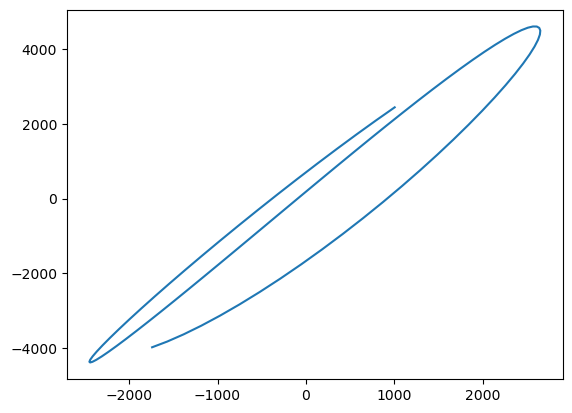

In [20]:
plt.plot(r_store[1],r_store[2])